# OpenLandMap USDA Soil Taxonomy Great Groups

<br>

#### Google Earth Engine (GEE)
https://developers.google.com/earth-engine/datasets/catalog/RESOLVE_ECOREGIONS_2017#table-schema

<br> The RESOLVE Ecoregions dataset, updated in 2017, offers a depiction of the 846 terrestrial ecoregions that represent our living planet. View the stylized map at https://ecoregions2017.appspot.com/ or in Earth Engine.

<br> "Ecoregions, in the simplest definition, are ecosystems of regional extent. Specifically, ecoregions represent distinct assemblages of biodiversity-all taxa, not just vegetation-whose boundaries include the space required to sustain ecological processes. Ecoregions provide a useful basemap for conservation planning in particular because they draw on natural, rather than political, boundaries, define distinct biogeographic assemblages and ecological habitats within biomes, and assist in representation of Earth's biodiversity... "

<br>

> ##### * Data was downloaded from GEE

<br><br>

In [1]:
# File and Data Manipulation
import os                       # interacting with the operating system
import glob                     # retrieving files/pathnames matching a specified pattern
from collections import Counter # counting hashable objects
import shutil                   # high-level file operations
import pickle                   # serializing and de-serializing Python object structures

# Data Analysis
import numpy as np              # numerical operations
import pandas as pd             # data manipulation and analysis

# Geospatial Data Handling
import geopandas as gpd         # working with geospatial data

# Data Visualization
import matplotlib.pyplot as plt       # creating static, interactive, and animated visualizations
plt.style.use("default")              # Set the default style matplotlib plots
import matplotlib.colors as mcolors   # colors for legend
import matplotlib.patches as mpatches # drawing patches (shapes) for legend

# Suppress Warnings
import warnings                   # handling warnings
warnings.filterwarnings("ignore") # Suppress all warnings (use with caution!)

In [2]:
# Define Working Directory
os.chdir('J:\Chomiak_Python\Chomiak_Notebooks\Maps_Siberia_Data')
# Yenisey Watershed (Shapefile)
AGRO_Watershed = gpd.read_file('ArcticGRO_Yenisei_watershed')
# Lakes (Shapefile)
gpd_lakes = gpd.read_file('GeoPandas_Yenisei_lakes')

In [3]:
# EcoRegions
file_path = 'Yenisey_RESOLVE_Ecoregions_2017-20231004T231619Z-001\Yenisey_RESOLVE_Ecoregions_2017'
eco = gpd.read_file(file_path)
print(eco.crs)
print()
print(eco.dtypes)
eco.head(1)

epsg:4326

BIOME_NUM      float64
ECO_BIOME_      object
BIOME_NAME      object
NNH              int64
REALM           object
SHAPE_AREA     float64
OBJECTID       float64
COLOR_NNH       object
COLOR_BIO       object
COLOR           object
ECO_NAME        object
SHAPE_LENG     float64
ECO_ID           int64
LICENSE         object
NNH_NAME        object
geometry      geometry
dtype: object


,BIOME_NUM,ECO_BIOME_,BIOME_NAME,NNH,REALM,SHAPE_AREA,OBJECTID,COLOR_NNH,COLOR_BIO,COLOR,ECO_NAME,SHAPE_LENG,ECO_ID,LICENSE,NNH_NAME,geometry
0,8.0,PA08,"Temperate Grasslands, Savannas & Shrublands",3,Palearctic,103.136132,450.0,#F9A91B,#FEFF73,#F6FC38,Mongolian-Manchurian grassland,134.47724,734,CC-BY 4.0,Nature Could Recover,"POLYGON ((101.94579 47.66663, 101.95419 47.748..."


(38.66748274410985, 77.76253523829509)

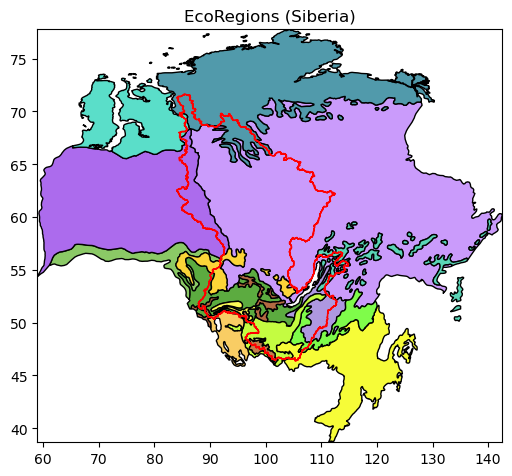

In [4]:
# Quick Plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title('EcoRegions (Siberia)', fontsize=12)
AGRO_Watershed.plot(ax=ax, color='none', edgecolor='red', lw=1, zorder=2)
eco.plot(ax=ax, color=eco['COLOR'], edgecolor='black', lw=1)
# Setting the plot limits to the extent of the eco data
xmin, ymin, xmax, ymax = eco.total_bounds
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

### Clip the Data to the Area of Interest

In [5]:
# Clip
#clipped_eco = gpd.clip(eco, AGRO_Watershed)

# Save to file
#clipped_eco.to_file('Yenisey_RESOLVE_Ecoregions')

# Open File
clipped_eco = gpd.read_file('Yenisey_RESOLVE_Ecoregions')

(46.37338787934154, 71.62704695372541)

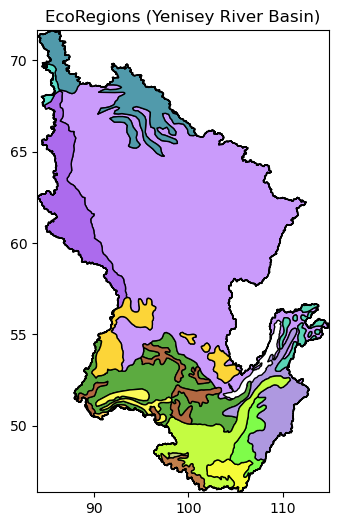

In [6]:
# Quick Plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title('EcoRegions (Yenisey River Basin)', fontsize=12)
AGRO_Watershed.plot(ax=ax, color='none', edgecolor='black', lw=1, zorder=2)
clipped_eco.plot(ax=ax, color=eco['COLOR'], edgecolor='black', lw=1)
# Setting the plot limits to the extent of the eco data
xmin, ymin, xmax, ymax = clipped_eco.total_bounds
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

### Create New Biome Color Scheme

In [7]:
# Defining the color palette based on the provided biome names and suggested colors
biome_colors = {
    'Temperate Grasslands, Savannas & Shrublands': 'yellow',
    'Temperate Broadleaf & Mixed Forests': '#32CD32',
    'Temperate Conifer Forests': '#006400',
    'Boreal Forests/Taiga': '#3CB371',
    'Montane Grasslands & Shrublands': 'plum',
    'Tundra': 'gray',
    'Deserts & Xeric Shrublands': 'red'
}
# Adding the "NEW_BIOME_COLOR" column to the eco GeoDataFrame
clipped_eco['NEW_BIOME_COLOR'] = clipped_eco['BIOME_NAME'].map(biome_colors)

(46.37338787934154, 71.62704695372541)

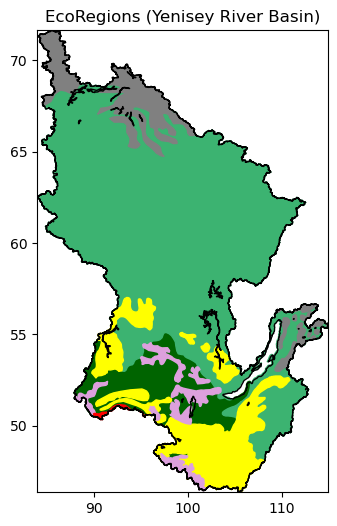

In [8]:
culer = clipped_eco['NEW_BIOME_COLOR'].tolist()

# Quick Plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title('EcoRegions (Yenisey River Basin)', fontsize=12)
AGRO_Watershed.plot(ax=ax, color='none', edgecolor='black', lw=1, zorder=2)
clipped_eco.plot(ax=ax, color=culer, edgecolor=culer, lw=1)
gpd_lakes.plot(ax=ax, edgecolor='black', color='none', lw=1, zorder=6)

# Setting the plot limits to the extent of the eco data
xmin, ymin, xmax, ymax = clipped_eco.total_bounds
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

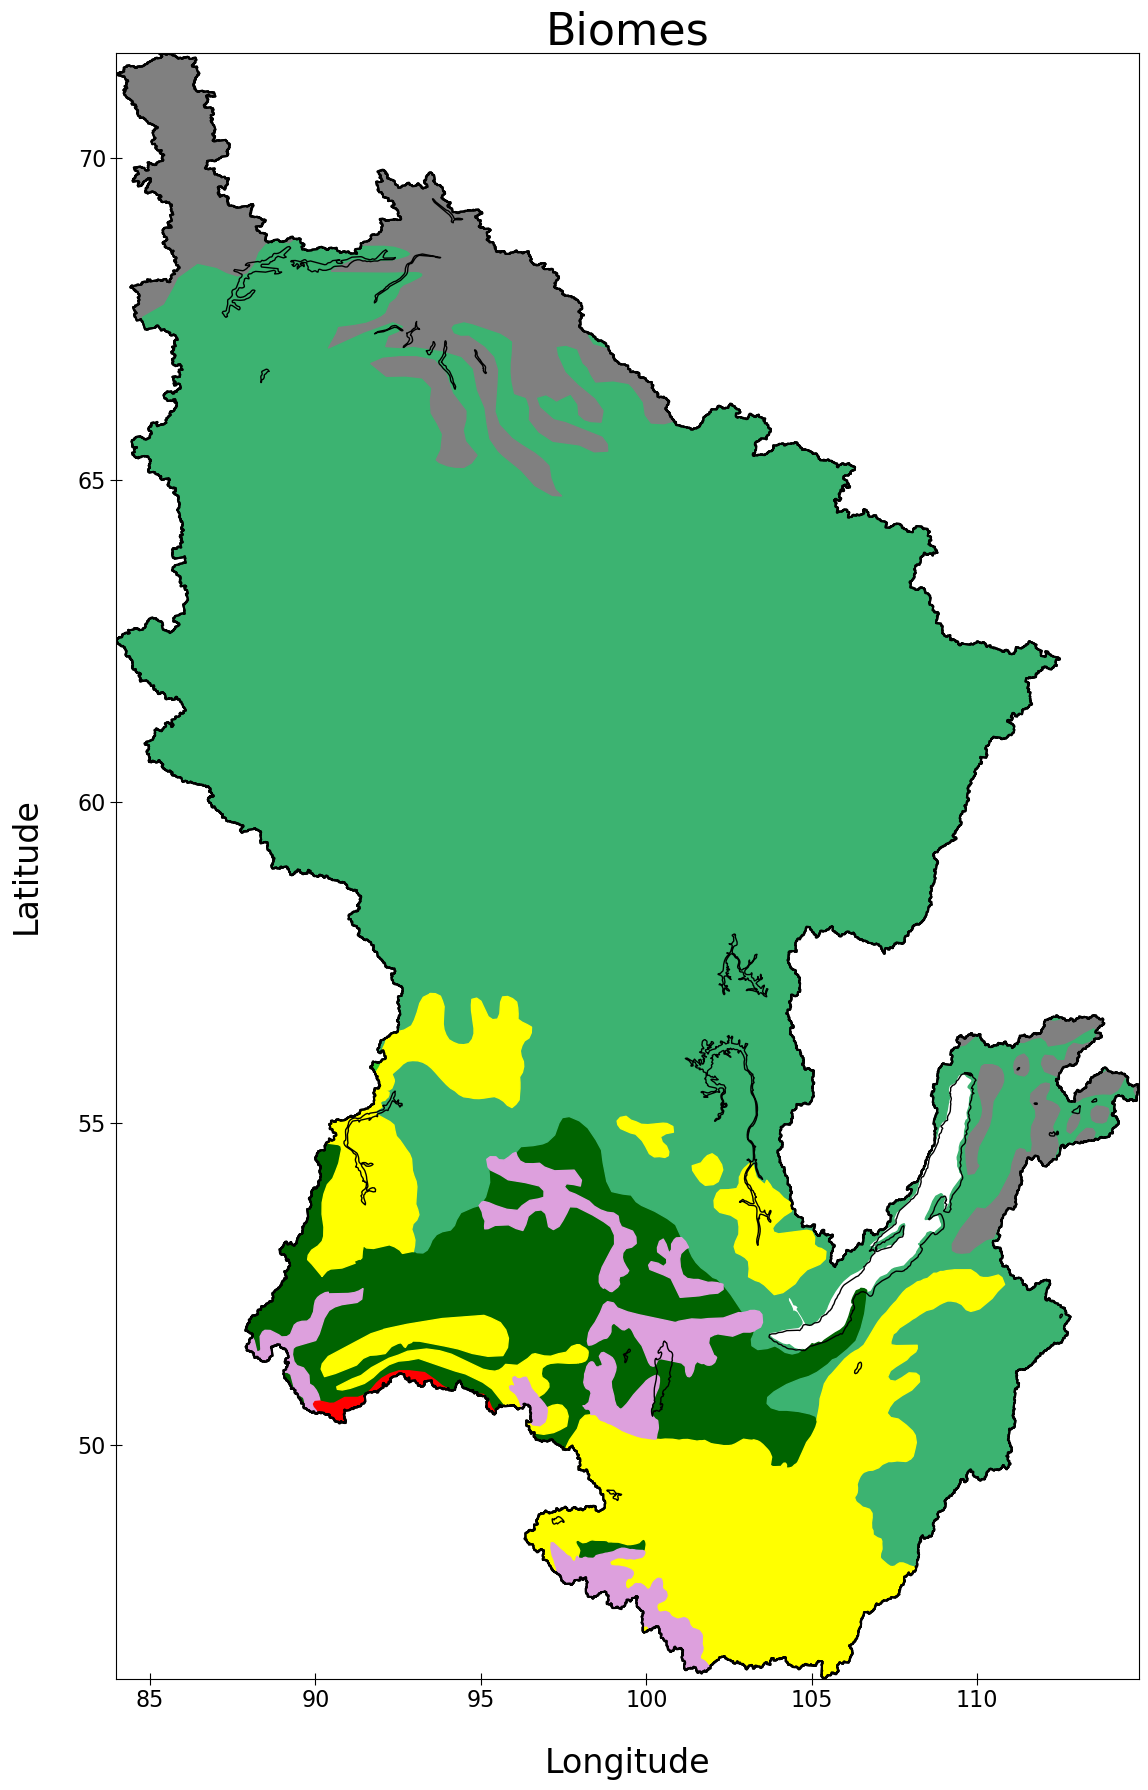

In [9]:
culer = clipped_eco['NEW_BIOME_COLOR'].tolist()

# Plotting the GeoDataFrames as subplots
fig, ax = plt.subplots(figsize=(18, 18))
ax.set_title('Biomes', fontsize=32)
ax.set_xlabel('Longitude', color='black', fontsize=24, labelpad=25)
ax.set_ylabel('Latitude', color='black', fontsize=24, labelpad=25)
clipped_eco.plot(ax=ax, color=culer, edgecolor=culer)
AGRO_Watershed.plot(ax=ax, color='none', edgecolor='black', lw=1.5, zorder=6)
ax.xaxis.set_tick_params(which='major', direction='inout', length=8, labelsize=16)
ax.yaxis.set_tick_params(which='major', direction='inout', length=8, labelsize=16)

# Setting the plot limits to the extent of the eco data
xmin, ymin, xmax, ymax = clipped_eco.total_bounds
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

AGRO_Watershed.plot(ax=ax, color='none', edgecolor='black', lw=1.5, zorder=8)
gpd_lakes.plot(ax=ax, edgecolor='black', color='none', lw=1, zorder=6)

fig.tight_layout()


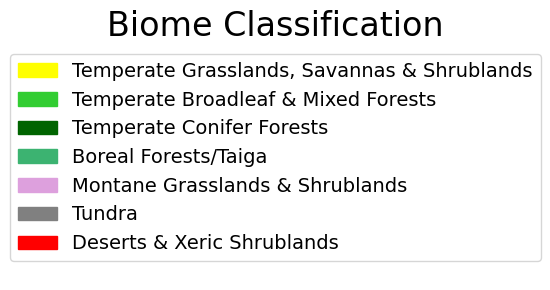

In [10]:
# Extracting colors and labels from the biome_colors dictionary
colors_biome = list(biome_colors.values())
labels_biome = list(biome_colors.keys())

# Create a list of patches for the legend
patches_biome = [mpatches.Patch(color=color, label=label) for color, label in zip(colors_biome, labels_biome)]

# Create the figure for the legend
fig, ax = plt.subplots(figsize=(6, 3))  # Adjust the size based on the number of columns you want
ax.legend(handles=patches_biome, loc='upper center', fontsize=14, ncol=1)  # Adjust ncol as needed
ax.axis('off')  # Turn off the axis
plt.title("Biome Classification", fontsize=24)
fig.tight_layout()

#fig.savefig("Yenisey_2016_EcoRegions_legend_biome.png", dpi=600, bbox_inches='tight')

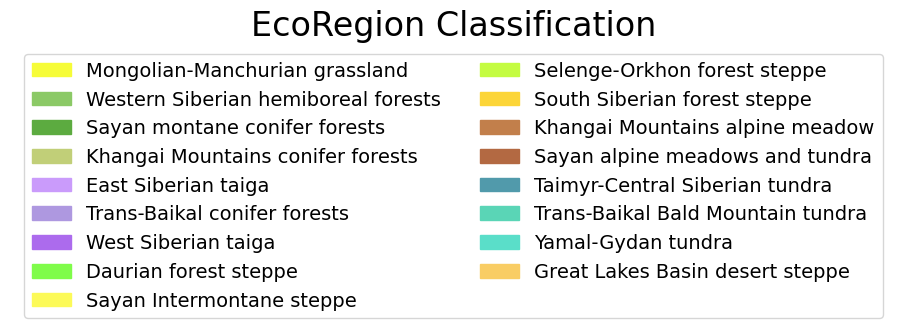

In [11]:
labels_1 = clipped_eco['ECO_NAME'].tolist()
colors_1 = clipped_eco['COLOR'].tolist()

# Create a list of patches for the legend
patches = [mpatches.Patch(color=color, label=label) for color, label in zip(colors_1, labels_1)]

# Create the figure for the legend
fig, ax = plt.subplots(figsize=(10, 3))  # Adjust the size based on the number of columns you want
ax.legend(handles=patches, loc='upper center', fontsize=14, ncol=2)  # Adjust ncol as needed
ax.axis('off')  # Turn off the axis
plt.title("EcoRegion Classification", fontsize=24)
plt.tight_layout()
plt.show()

#fig.savefig("Yenisey_2016_EcoRegions_legend_1.png", dpi=600, bbox_inches='tight')

<br><br>

#### Reproject the Dictionary for Area Calculations

- EPSG:3573
- WGS 84 / North Pole LAEA Canada
- https://epsg.io/3573

<br><br>

In [12]:
AGRO_Watershed_3573 = AGRO_Watershed.to_crs(3573)
AGRO_Watershed_3573_total_area_shapefile_km2 = AGRO_Watershed_3573.geometry.area.sum() / 1e6
print(f"Total Area = {AGRO_Watershed_3573_total_area_shapefile_km2:.0f} km2")

Total Area = 2577444 km2


In [13]:
# Reproject the Yenisei River Watershed shapefile to match the permafrost data's CRS
clipped_eco_3573 = clipped_eco.to_crs(3573)

# Calculating area for each ecoregion in km2
clipped_eco_3573['area_km2'] = clipped_eco_3573['geometry'].area / 1e6

# Calculating the relative contributions based on areas
total_area_km2 = clipped_eco_3573['area_km2'].sum()
print(f"Total Area = {total_area_km2:.0f} km2")

# Relative Contributions
clipped_eco_3573['relative_contribution'] = (clipped_eco_3573['area_km2'] / total_area_km2) * 100

Total Area = 2546386 km2


In [14]:
# Check how much the shapefile covers of the total area of the watershed
xxx = (total_area_km2/AGRO_Watershed_3573_total_area_shapefile_km2)*100
print(f"Coverage = {xxx:.3f} %")

Coverage = 98.795 %


In [15]:
print(clipped_eco_3573['ECO_NAME'])

0          Mongolian-Manchurian grassland
1     Western Siberian hemiboreal forests
2           Sayan montane conifer forests
3       Khangai Mountains conifer forests
4                     East Siberian taiga
5            Trans-Baikal conifer forests
6                     West Siberian taiga
7                   Daurian forest steppe
8               Sayan Intermontane steppe
9            Selenge-Orkhon forest steppe
10           South Siberian forest steppe
11        Khangai Mountains alpine meadow
12        Sayan alpine meadows and tundra
13         Taimyr-Central Siberian tundra
14      Trans-Baikal Bald Mountain tundra
15                     Yamal-Gydan tundra
16        Great Lakes Basin desert steppe
Name: ECO_NAME, dtype: object


In [16]:
print(clipped_eco_3573['BIOME_NAME'])

0     Temperate Grasslands, Savannas & Shrublands
1             Temperate Broadleaf & Mixed Forests
2                       Temperate Conifer Forests
3                       Temperate Conifer Forests
4                            Boreal Forests/Taiga
5                            Boreal Forests/Taiga
6                            Boreal Forests/Taiga
7     Temperate Grasslands, Savannas & Shrublands
8     Temperate Grasslands, Savannas & Shrublands
9     Temperate Grasslands, Savannas & Shrublands
10    Temperate Grasslands, Savannas & Shrublands
11                Montane Grasslands & Shrublands
12                Montane Grasslands & Shrublands
13                                         Tundra
14                                         Tundra
15                                         Tundra
16                     Deserts & Xeric Shrublands
Name: BIOME_NAME, dtype: object


### Spatial Dissolve

In [17]:
# Dissolving the geometries based on the "BIOME_NAME" and "NEW_BIOME_COLOR" columns
dissolved_eco_color = clipped_eco_3573.dissolve(by=["BIOME_NAME", "NEW_BIOME_COLOR"], aggfunc='sum')

# Resetting the index for the resulting GeoDataFrame
dissolved_eco_color.reset_index(inplace=True)

dissolved_eco_color[['BIOME_NAME', 'NEW_BIOME_COLOR', 'geometry']]

,BIOME_NAME,NEW_BIOME_COLOR,geometry
0,Boreal Forests/Taiga,#3CB371,"MULTIPOLYGON (((-812352.744 2410773.541, -8101..."
1,Deserts & Xeric Shrublands,red,"MULTIPOLYGON (((-1113110.319 4141304.681, -111..."
2,Montane Grasslands & Shrublands,plum,"MULTIPOLYGON (((-1029658.144 3839616.129, -103..."
3,Temperate Broadleaf & Mixed Forests,#32CD32,"POLYGON ((-778544.754 3661554.736, -777750.645..."
4,Temperate Conifer Forests,#006400,"MULTIPOLYGON (((-1035773.106 3827631.054, -103..."
5,"Temperate Grasslands, Savannas & Shrublands",yellow,"MULTIPOLYGON (((-1264594.626 3619425.760, -126..."
6,Tundra,gray,"MULTIPOLYGON (((-348456.093 2343983.885, -3480..."


In [18]:
# Sorting the ecoregions by their relative contribution in descending order
sorted_eco_3573 = dissolved_eco_color.sort_values(by='relative_contribution', ascending=False)
sorted_eco_3573

,BIOME_NAME,NEW_BIOME_COLOR,geometry,BIOME_NUM,NNH,SHAPE_AREA,OBJECTID,SHAPE_LENG,ECO_ID,area_km2,relative_contribution
0,Boreal Forests/Taiga,#3CB371,"MULTIPOLYGON (((-812352.744 2410773.541, -8101...",18.0,6,974.154705,1751.0,624.246648,2148,1.640927e+06,64.441399
5,"Temperate Grasslands, Savannas & Shrublands",yellow,"MULTIPOLYGON (((-1264594.626 3619425.760, -126...",40.0,12,184.656832,2540.0,365.026149,3671,3.980304e+05,15.631190
4,Temperate Conifer Forests,#006400,"MULTIPOLYGON (((-1035773.106 3827631.054, -103...",10.0,5,47.846535,987.0,150.547744,1407,2.653791e+05,10.421795
6,Tundra,gray,"MULTIPOLYGON (((-348456.093 2343983.885, -3480...",33.0,6,379.384432,2274.0,707.939939,2347,1.465710e+05,5.756040
2,Montane Grasslands & Shrublands,plum,"MULTIPOLYGON (((-1029658.144 3839616.129, -103...",20.0,4,15.044530,984.0,87.587819,1519,9.058967e+04,3.557578
1,Deserts & Xeric Shrublands,red,"MULTIPOLYGON (((-1113110.319 4141304.681, -111...",13.0,3,19.296198,284.0,46.780484,826,4.668898e+03,0.183354
3,Temperate Broadleaf & Mixed Forests,#32CD32,"POLYGON ((-778544.754 3661554.736, -777750.645...",4.0,3,32.378164,797.0,89.673996,687,2.201081e+02,0.008644


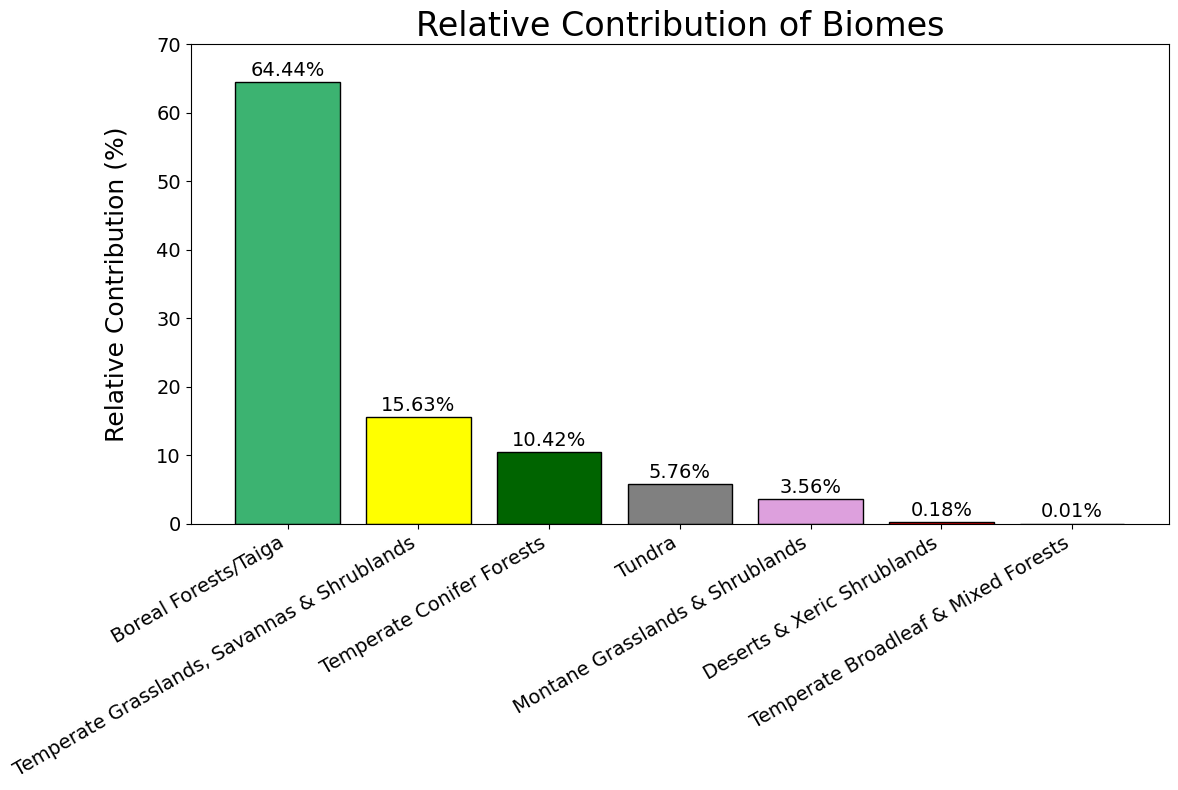

In [19]:
# Setting up the bar plot
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(sorted_eco_3573['BIOME_NAME'], sorted_eco_3573['relative_contribution'], 
              color=sorted_eco_3573['NEW_BIOME_COLOR'], edgecolor='black')

# Displaying the value above each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2., height + 0.3,
            '{:.2f}%'.format(height),
            ha='center', va='bottom', fontsize=14)
    
# Setting plot title and labels
ax.set_title('Relative Contribution of Biomes', fontsize=24)
#ax.set_xlabel('Ecoregions', fontsize=18)
ax.set_ylabel('Relative Contribution (%)', fontsize=18, labelpad=20)
#ax.set_xticks([])  # Hide x-axis ticks for clarity
ax.set_ylim(0,70)
# Rotate x labels for better readability
plt.xticks(rotation=30, ha='right', fontsize=14)
plt.yticks(fontsize=14)

# Displaying the bar plot
fig.tight_layout()

#fig.savefig("Yenisey_2016_EcoRegions_barplot_BIOMENAME.png", dpi=600, bbox_inches='tight')

### Rename the Biome Names so they stack (line break)

In [20]:
sorted_eco_3573['BIOME_NAME']

0                           Boreal Forests/Taiga
5    Temperate Grasslands, Savannas & Shrublands
4                      Temperate Conifer Forests
6                                         Tundra
2                Montane Grasslands & Shrublands
1                     Deserts & Xeric Shrublands
3            Temperate Broadleaf & Mixed Forests
Name: BIOME_NAME, dtype: object

In [21]:
sorted_eco_3573['Biomes'] = [
    'Boreal \nForests',
    'Grasslands,\nSavannas \n& Shrublands', 
    'Conifer\nForests',
    'Tundra',
    'Montane\nGrasslands &\nShrublands', 
    'Deserts \n& Xeric\nShrublands', 
    'Broadleaf &\nMixed \nForests'
]


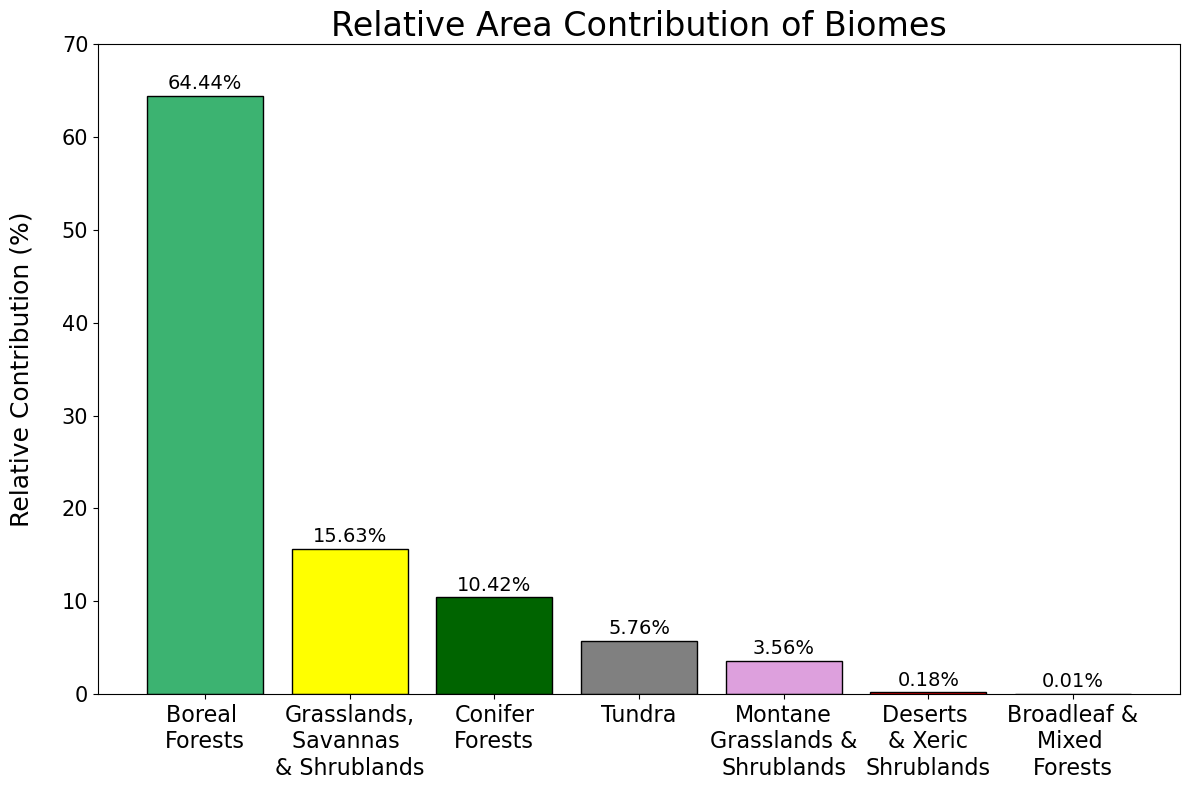

In [22]:
# Setting up the bar plot
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(sorted_eco_3573['Biomes'], sorted_eco_3573['relative_contribution'], 
              color=sorted_eco_3573['NEW_BIOME_COLOR'], edgecolor='black')

# Displaying the value above each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2., height + 0.3,
            '{:.2f}%'.format(height),
            ha='center', va='bottom', fontsize=14)
    
# Setting plot title and labels
ax.set_title('Relative Area Contribution of Biomes', fontsize=24)
#ax.set_xlabel('Ecoregions', fontsize=18)
ax.set_ylabel('Relative Contribution (%)', fontsize=18, labelpad=20)
#ax.set_xticks([])  # Hide x-axis ticks for clarity
ax.set_ylim(0,70)

# Rotate x labels for better readability
plt.xticks(rotation=0, ha='center', fontsize=16)
plt.yticks(fontsize=15)

# Displaying the bar plot
fig.tight_layout()

#fig.savefig("Yenisey_2016_EcoRegions_barplot_BIOMENAME.png", dpi=600, bbox_inches='tight')

# Concluding Remarks

We now have a breakdown of area coverage for each biome. A massive portion of the Yenisey River basin is covered by forests (75%), which contribute lignin-rich organic carbon to the Arctic Ocean. 